# Listes chaînées

## Un outil de visualisation

Voici une proposition de code pour implémenter une liste chaînée. Pour favoriser la compréhension on fera appel à la bibliothèque `lolviz`

```shell
$ sudo apt install graphviz
$ python3 -m pip install lolviz
```
Voici une petite fonction qui facilitera la visualisation selon le type des objets étudiés: 

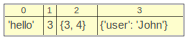

In [141]:
from mon_viz import viz

data = ['hello', 3, {3, 4}, {"user": "John"}]
viz(data)

In [142]:
n, m = 3, 4
exemple_matrice = [[0 if i != j else 1 for i in range(n)] for j in range(m)]
viz(exemple_matrice)

In [143]:
viz(exemple_matrice, mode="matrix")

## Une implémentation des listes chaînées

Voici maintenant le code de l'implémentation des listes chaînées :

In [144]:
from __future__ import annotations
from typing import Generic, TypeVar, Optional
import random

T = TypeVar("T")

class Maillon(Generic[T]):

    def __init__(self: Maillon[T], val: T) -> None:
        self._val = val
        self._suiv: Optional[Maillon[T]] = None

    def get_val(self: Maillon[T]) -> T:
        return self._val 

    def get_suiv(self: Maillon[T]) -> Optional[Maillon[T]]:
        return self._suiv

    def set_suiv(self: Maillon[T], m: Optional[Maillon[T]]) -> None:
        if m is None or (type(m._val) == type(self._val)):
            self._suiv = m
        else:
            raise TypeError(f"Insertion d'un {str(type(m._val))[7:-1]} dans une liste de {str(type(self._val))[7:-1]}")  


class ListeC(Generic[T]):

    def __init__(self: ListeC[T]) -> None:
        self._tete: Optional[Maillon[T]] = None

    def est_vide(self: ListeC[T]) -> bool:
        return self._tete is None

    def get_val_tete(self: Liste[T]) -> T:
        return self._tete.get_val()

    def get_suiv_tete(self: Liste[T]) -> T:
        return self._tete.get_suiv()

    def queue(self: ListeC[T]) -> ListeC[T]:
        qt: ListeC[T] = ListeC()
        if not self._tete is None:
            qt._tete = self._tete.get_suiv() 
        return qt

    def set_tete(self: ListeC[T], val: T) -> ListeC[T]:
        if self._tete is None:
            self._tete = Maillon(val)
            return self
        else:
            t = Maillon(val)
            t.set_suiv(self._tete)
            self._tete = t
            return self
            
    



In [145]:
ls = ListeC()
for nb in random.choices(range(1000), k = 10):
    ls = ls.set_tete(nb)
viz(ls)

### Questions

1. Étudier et expliquer le code proposé. 

1. Donner les instructions pour créer la liste 1,2,3,4,5

1. Créer les fonctions suivantes:

    1. `taille` qui renvoie le nombre d'éléments de la liste.
    1. `somme` qui calcule la somme des éléments d'une liste.

    1. `insere_fin` qui insere un élément à la fin d'une liste chaînée.

    2. `get_el` qui a pour paramètre un entier i et qui renvoie la valeur du i-ème maillon de la liste.

    3. `insere_entre`  qui a pour paramètre un entier i et qui insère une valeur en i-ème position dans la liste.

    4. `map` qui a pour paramètre une fonction et qui  renvoie la liste dont les éléments sont les images des éléments de la liste de départ dans le même ordre

    5. `renverse` qui renvoie la liste dans l'ordre inverse.

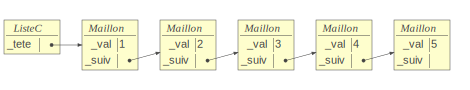

In [146]:
l = ListeC() # on crée une liste vide
for k in range(5, 0, -1):
    l = l.set_tete(k)
viz(l)

In [147]:
l.get_val_tete()

1

In [148]:
def taille(xs: ListeC) -> int:
    """
    Fonction récursive renvoyant le nombre d'éléments d'une liste
    """
    if xs.est_vide(): # cas terminal
        return 0
    else: # descente vers le cas terminal
        return 1 + taille(xs.queue())


In [149]:
taille(l)

5

In [150]:
def somme(xs: ListeC[T]) -> T:
    """
    Fonction récursive renvoyant le nombre d'éléments d'une liste
    """
    if xs.est_vide(): # exception
        raise ValueError("Liste vide !")
    elif xs.queue().est_vide(): # cas terminal
        return xs.get_val_tete()
    else: # descente vers le cas terminal
        return xs.get_val_tete() + somme(xs.queue())

In [151]:
somme(l)

15

In [152]:
def insere_fin(xs:ListeC[T], el:T) -> ListeC[T]:
    if xs.est_vide():
        return xs.set_tete(el)
    else:
        return insere_fin(xs.queue(),el).set_tete(xs.get_val_tete())

In [153]:
viz(insere_fin(l, 3.14))

TypeError: Insertion d'un 'float' dans une liste de 'int'

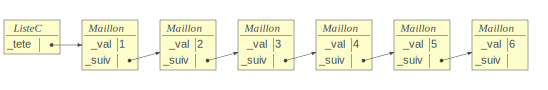

In [72]:
viz(insere_fin(l, 6))

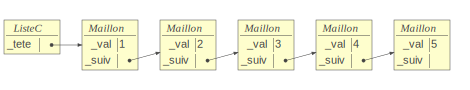

In [73]:
viz(l)

In [74]:
def get_el(xs:ListeC[T], i:int) -> T:
    if xs.est_vide():
        raise IndexError("Cet indice n'est pas valide")
    elif i == 0:
        return xs.get_val_tete()
    else:
        return get_el(xs.queue(), i - 1)

In [75]:
get_el(l, 4)

5

In [138]:
# version impérative
def get_el_imp(xs:ListeC[T], i:int) -> T:
    if xs.est_vide():
        raise IndexError("Cet indice n'est pas valide")
    ys = xs
    for _ in range(i): # on coupe i fois la tête
        ys = ys.queue()
    return ys.get_val_tete()


In [139]:
get_el_imp(l, 4)

5